# Projet 5 

 ## Importation des datas

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt
import scipy.stats as st

In [2]:
erp = pd.read_excel('C:/Users/fafar/Documents/Data Analyst/P_5/erp.xlsx')
liaison = pd.read_excel('C:/Users/fafar/Documents/Data Analyst/P_5/liaison.xlsx')
web = pd.read_excel('C:/Users/fafar/Documents/Data Analyst/P_5/web.xlsx')

C:\Users\fafar\anaconda3\lib\site-packages\openpyxl\worksheet\_reader.py:312: UserWarning: Unknown extension is not supported and will be removed
  warn(msg)


## Exploration des datas

In [3]:
print(erp.shape)
print(liaison.shape)
print(web.shape)

(825, 5)
(825, 2)
(1513, 28)


In [4]:
erp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 825 entries, 0 to 824
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   product_id      825 non-null    int64  
 1   onsale_web      825 non-null    int64  
 2   price           825 non-null    float64
 3   stock_quantity  825 non-null    int64  
 4   stock_status    825 non-null    object 
dtypes: float64(1), int64(3), object(1)
memory usage: 32.4+ KB


In [5]:
liaison.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 825 entries, 0 to 824
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   product_id  825 non-null    int64 
 1   id_web      734 non-null    object
dtypes: int64(1), object(1)
memory usage: 13.0+ KB


In [6]:
web.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1513 entries, 0 to 1512
Data columns (total 28 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   sku                    1428 non-null   object        
 1   virtual                1513 non-null   int64         
 2   downloadable           1513 non-null   int64         
 3   rating_count           1513 non-null   int64         
 4   average_rating         1430 non-null   float64       
 5   total_sales            1430 non-null   float64       
 6   tax_status             716 non-null    object        
 7   tax_class              0 non-null      float64       
 8   post_author            1430 non-null   float64       
 9   post_date              1430 non-null   datetime64[ns]
 10  post_date_gmt          1430 non-null   datetime64[ns]
 11  post_content           0 non-null      float64       
 12  post_title             1430 non-null   object        
 13  pos

In [7]:
erp.head()

,product_id,onsale_web,price,stock_quantity,stock_status
0,3847,1,24.2,0,outofstock
1,3849,1,34.3,0,outofstock
2,3850,1,20.8,0,outofstock
3,4032,1,14.1,0,outofstock
4,4039,1,46.0,0,outofstock


In [8]:
web.head()

,sku,virtual,downloadable,rating_count,average_rating,total_sales,tax_status,tax_class,post_author,post_date,...,post_name,post_modified,post_modified_gmt,post_content_filtered,post_parent,guid,menu_order,post_type,post_mime_type,comment_count
0,bon-cadeau-25-euros,0,0,0,0.0,10.0,taxable,NaN,1.0,2018-06-01 13:53:46,...,bon-cadeau-de-25-euros,2018-06-01 14:13:57,2018-06-01 12:13:57,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0
1,15298,0,0,0,0.0,6.0,taxable,NaN,2.0,2018-02-08 12:58:52,...,pierre-jean-villa-saint-joseph-preface-2018,2019-12-30 09:30:29,2019-12-30 08:30:29,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0
2,15296,0,0,0,0.0,0.0,taxable,NaN,2.0,2018-02-08 13:49:41,...,pierre-jean-villa-saint-joseph-tilde-2017,2019-12-21 09:00:17,2019-12-21 08:00:17,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0
3,15300,0,0,0,0.0,0.0,taxable,NaN,2.0,2018-02-08 14:08:36,...,pierre-jean-villa-croze-hermitage-accroche-coe...,2020-06-26 18:15:03,2020-06-26 16:15:03,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0
4,19814,0,0,0,0.0,3.0,taxable,NaN,2.0,2018-02-09 14:01:05,...,pierre-jean-villa-igp-gamine-2018,2020-01-04 16:36:01,2020-01-04 15:36:01,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0


In [9]:
liaison.head()

,product_id,id_web
0,3847,15298
1,3849,15296
2,3850,15300
3,4032,19814
4,4039,19815


In [10]:
erp.describe()

,product_id,onsale_web,price,stock_quantity
count,825.000000,825.000000,825.000000,825.000000
mean,5162.597576,0.869091,32.415636,26.496970
std,902.644635,0.337506,26.795849,45.892422
min,3847.000000,0.000000,5.200000,0.000000
25%,4348.000000,1.000000,14.600000,1.000000
50%,4907.000000,1.000000,24.400000,11.000000
75%,5805.000000,1.000000,42.000000,34.000000
max,7338.000000,1.000000,225.000000,578.000000


In [11]:
web.describe()

,virtual,downloadable,rating_count,average_rating,total_sales,tax_class,post_author,post_content,post_password,post_content_filtered,post_parent,menu_order,comment_count
count,1513.0,1513.0,1513.0,1430.0,1430.000000,0.0,1430.000000,0.0,0.0,0.0,1430.0,1430.0,1430.0
mean,0.0,0.0,0.0,0.0,4.006993,NaN,1.998601,NaN,NaN,NaN,0.0,0.0,0.0
std,0.0,0.0,0.0,0.0,8.510559,NaN,0.037385,NaN,NaN,NaN,0.0,0.0,0.0
min,0.0,0.0,0.0,0.0,0.000000,NaN,1.000000,NaN,NaN,NaN,0.0,0.0,0.0
25%,0.0,0.0,0.0,0.0,0.000000,NaN,2.000000,NaN,NaN,NaN,0.0,0.0,0.0
50%,0.0,0.0,0.0,0.0,1.000000,NaN,2.000000,NaN,NaN,NaN,0.0,0.0,0.0
75%,0.0,0.0,0.0,0.0,4.000000,NaN,2.000000,NaN,NaN,NaN,0.0,0.0,0.0
max,0.0,0.0,0.0,0.0,96.000000,NaN,2.000000,NaN,NaN,NaN,0.0,0.0,0.0


In [12]:
web.isnull().sum()

sku                        85
virtual                     0
downloadable                0
rating_count                0
average_rating             83
total_sales                83
tax_status                797
tax_class                1513
post_author                83
post_date                  83
post_date_gmt              83
post_content             1513
post_title                 83
post_excerpt              797
post_status                83
comment_status             83
ping_status                83
post_password            1513
post_name                  83
post_modified              83
post_modified_gmt          83
post_content_filtered    1513
post_parent                83
guid                       83
menu_order                 83
post_type                  83
post_mime_type            799
comment_count              83
dtype: int64

In [13]:
liaison.isnull().sum()

product_id     0
id_web        91
dtype: int64

## Cleaning des Datas

In [14]:
web = web.rename(columns={"sku": "id_web"}, errors="raise")    #la colonne sku devient id_web

In [15]:
web_sell = web.loc[web['post_type'] == 'product']


In [16]:
not_listed = web_sell[web_sell['id_web'].isnull()]
not_listed ## Ici nous avons 2 ventes non-listé donc sans correspondances. A conserver...

,id_web,virtual,downloadable,rating_count,average_rating,total_sales,tax_status,tax_class,post_author,post_date,...,post_name,post_modified,post_modified_gmt,post_content_filtered,post_parent,guid,menu_order,post_type,post_mime_type,comment_count
470,NaN,0,0,0,0.0,0.0,taxable,NaN,2.0,2018-07-31 12:07:23,...,pierre-jean-villa-cote-rotie-fongeant-2017,2019-11-02 13:24:15,2019-11-02 12:24:15,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0
471,NaN,0,0,0,0.0,0.0,taxable,NaN,2.0,2018-08-08 11:23:43,...,pierre-jean-villa-condrieu-suspendu-2018,2019-11-02 13:24:01,2019-11-02 12:24:01,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0


In [17]:
web_sell = web_sell[web_sell['id_web'].notna()]     #ici j'ai supprimé toute les lignes dont les valeurs id_web sont NaN

In [18]:
web_sell = web_sell.drop(columns=["virtual", "downloadable", "rating_count","average_rating","tax_status","tax_class","post_author","post_date","post_modified","post_modified_gmt","post_content","post_content_filtered","post_parent","guid","menu_order","post_mime_type","comment_count"], axis=1)


In [19]:
web_sell = web_sell.drop(columns=["post_excerpt","comment_status","ping_status","post_password","post_name"])

In [20]:
web_sell
web_sell.shape

(714, 6)

## Liaison des tables 

In [21]:
erp.head()

,product_id,onsale_web,price,stock_quantity,stock_status
0,3847,1,24.2,0,outofstock
1,3849,1,34.3,0,outofstock
2,3850,1,20.8,0,outofstock
3,4032,1,14.1,0,outofstock
4,4039,1,46.0,0,outofstock


In [22]:
liaison.head()

,product_id,id_web
0,3847,15298
1,3849,15296
2,3850,15300
3,4032,19814
4,4039,19815


In [23]:
df_erp_liaison = erp.merge(liaison, on='product_id', how='outer', indicator = True)
df_erp_liaison.head()


,product_id,onsale_web,price,stock_quantity,stock_status,id_web,_merge
0,3847,1,24.2,0,outofstock,15298,both
1,3849,1,34.3,0,outofstock,15296,both
2,3850,1,20.8,0,outofstock,15300,both
3,4032,1,14.1,0,outofstock,19814,both
4,4039,1,46.0,0,outofstock,19815,both


In [24]:
erp_liaison_web = df_erp_liaison.merge(web_sell, on='id_web', how='outer', indicator = 'exists')
erp_liaison_web.shape

(825, 13)

In [25]:
erp_liaison_web = erp_liaison_web.drop(columns=["_merge"])

In [26]:
non_identifiable = erp_liaison_web.loc[erp_liaison_web['exists'] != 'both']
non_identifiable.head()    #Ci-dessous nous avons les ventes non identifiables qu'il est important de sauvegarder

,product_id,onsale_web,price,stock_quantity,stock_status,id_web,total_sales,post_date_gmt,post_title,post_status,post_type,exists
19,4055,0,86.1,0,outofstock,NaN,NaN,NaT,NaN,NaN,NaN,left_only
20,4090,0,73.0,0,outofstock,NaN,NaN,NaT,NaN,NaN,NaN,left_only
21,4092,0,47.0,0,outofstock,NaN,NaN,NaT,NaN,NaN,NaN,left_only
22,4195,0,14.1,0,outofstock,NaN,NaN,NaT,NaN,NaN,NaN,left_only
23,4209,0,73.5,0,outofstock,NaN,NaN,NaT,NaN,NaN,NaN,left_only


In [27]:
vente_online = erp_liaison_web.loc[erp_liaison_web['exists'] == 'both']
 #Dans cette dataFrame nous avons réuni toute les ventes en ligne

In [28]:
vente_online = vente_online.drop(columns=["exists"])

In [29]:
vente_online.head()     #Nous avons à présent toute les ventes en lignes qui ont été référencé dans l'ERP
#Nous allons ensuite pouvoir exploiter plus concrètement les données

,product_id,onsale_web,price,stock_quantity,stock_status,id_web,total_sales,post_date_gmt,post_title,post_status,post_type
0,3847,1,24.2,0,outofstock,15298,6.0,2018-02-08 11:58:52,Pierre Jean Villa Saint-Joseph Préface 2018,publish,product
1,3849,1,34.3,0,outofstock,15296,0.0,2018-02-08 12:49:41,Pierre Jean Villa Saint-Joseph Rouge Tildé 2017,publish,product
2,3850,1,20.8,0,outofstock,15300,0.0,2018-02-08 13:08:36,Pierre Jean Villa Crozes-Hermitage Accroche Co...,publish,product
3,4032,1,14.1,0,outofstock,19814,3.0,2018-02-09 13:01:05,Pierre Jean Villa IGP Collines Rhodaniennes Ga...,publish,product
4,4039,1,46.0,0,outofstock,19815,0.0,2018-02-12 08:04:37,Pierre Jean Villa Côte Rôtie Carmina 2017,publish,product


## Chiffre d’affaires par produit, ainsi que le total du chiffre d’affaires réalisé en ligne

In [30]:
vente_online['Chiffre d affaire'] = vente_online['price'] * vente_online['total_sales']

In [31]:
vente_online.head()       #Le chiffre d'affaire par produit est affiché dans la colonne chiffre d'affaire

,product_id,onsale_web,price,stock_quantity,stock_status,id_web,total_sales,post_date_gmt,post_title,post_status,post_type,Chiffre d affaire
0,3847,1,24.2,0,outofstock,15298,6.0,2018-02-08 11:58:52,Pierre Jean Villa Saint-Joseph Préface 2018,publish,product,145.2
1,3849,1,34.3,0,outofstock,15296,0.0,2018-02-08 12:49:41,Pierre Jean Villa Saint-Joseph Rouge Tildé 2017,publish,product,0.0
2,3850,1,20.8,0,outofstock,15300,0.0,2018-02-08 13:08:36,Pierre Jean Villa Crozes-Hermitage Accroche Co...,publish,product,0.0
3,4032,1,14.1,0,outofstock,19814,3.0,2018-02-09 13:01:05,Pierre Jean Villa IGP Collines Rhodaniennes Ga...,publish,product,42.3
4,4039,1,46.0,0,outofstock,19815,0.0,2018-02-12 08:04:37,Pierre Jean Villa Côte Rôtie Carmina 2017,publish,product,0.0


In [32]:
print("Le chiffre d'affaire total réalisé en ligne est de", vente_online['Chiffre d affaire'].sum(), "€")

Le chiffre d'affaire total réalisé en ligne est de 70568.6 €


## Detection des outliers 

In [33]:
vente_online.describe()

,product_id,onsale_web,price,stock_quantity,total_sales,Chiffre d affaire
count,714.000000,714.0,714.000000,714.000000,714.000000,714.000000
mean,5032.557423,1.0,32.493137,28.746499,4.012605,98.835574
std,790.510878,0.0,27.810525,48.012608,8.518183,307.685071
min,3847.000000,1.0,5.200000,0.000000,0.000000,0.000000
25%,4280.250000,1.0,14.100000,2.000000,0.000000,0.000000
50%,4796.000000,1.0,23.550000,12.000000,1.000000,15.250000
75%,5710.500000,1.0,42.175000,35.000000,4.000000,91.150000
max,7338.000000,1.0,225.000000,578.000000,96.000000,4704.000000


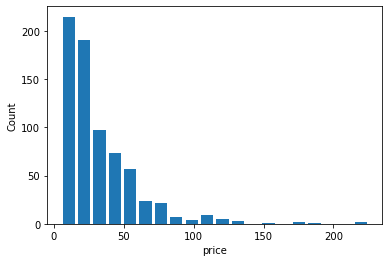

In [34]:
plt.hist(vente_online.price, bins=20, rwidth=0.8)
plt.xlabel('price')
plt.ylabel('Count')
plt.show()

In [35]:
data = vente_online['price']

### Utilisation de la méthode Zscore

In [37]:
price = vente_online['price']

# On écrit une fonction qui va lister les prix considérés comme outliers
outliers=[]
def detectOutlier(data):
    threshold=2
    mean = np.mean(data)
    std =np.std(data)
    
    for i in data:
        z_score = (i - mean)/std
        if np.abs(z_score) > threshold:
            outliers.append(i)
    return outliers

# On observe
priceOutliers = detectOutlier(price)
print("Nombre d'outliers détectés => " + str(len(priceOutliers)))
print(priceOutliers)


Nombre d'outliers détectés => 30
[100.0, 88.4, 225.0, 126.5, 176.0, 108.5, 157.0, 104.0, 109.6, 102.3, 137.0, 217.5, 105.0, 105.0, 112.0, 92.0, 124.8, 175.0, 191.3, 93.0, 122.0, 114.0, 135.0, 105.6, 116.4, 115.0, 121.0, 99.0, 115.0, 121.0]


<AxesSubplot:>

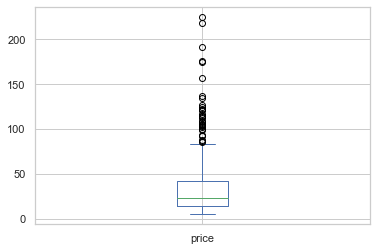

In [45]:
vente_online['price'].plot(kind='box')
#utilisation de l'un box plot pour avoir une vue d'ensemble des prix avec ses outliers représentés par des cercles

In [40]:
df = vente_online['price']

{'whiskers': [<matplotlib.lines.Line2D at 0x1a4b0070880>,
 'caps': [<matplotlib.lines.Line2D at 0x1a4b0070fa0>,
 'boxes': [<matplotlib.lines.Line2D at 0x1a4b00704c0>],
 'medians': [<matplotlib.lines.Line2D at 0x1a4b007c700>],
 'fliers': [<matplotlib.lines.Line2D at 0x1a4b007ca90>],
 'means': []}

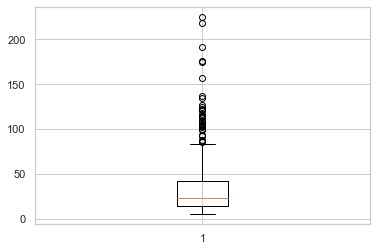

In [47]:
plt.boxplot(df)
#autre méthode pour avoir un box plot

<AxesSubplot:xlabel='price'>

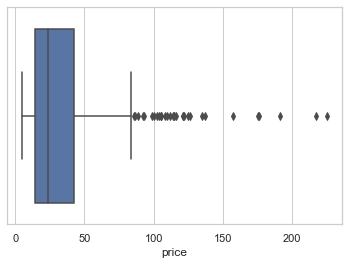

In [43]:
# on plot
sns.set(style="whitegrid") 
sns.boxplot(x = 'price', data = vente_online)
